In [4]:
## task 2 

import pandas as pd
import numpy as np

# dataset
rows = [
    (1,"Yes","Programming","Day","Yes"),
    (2,"No","Programming","Day","No"),
    (3,"Yes","History","Night","No"),
    (4,"No","Programming","Night","Yes"),
    (5,"Yes","English","Day","Yes"),
    (6,"No","Programming","Day","No"),
    (7,"Yes","Programming","Day","No"),
    (8,"Yes","Mathematics","Night","Yes"),
    (9,"Yes","Programming","Night","Yes"),
    (10,"Yes","Programming","Night","No"),
]

df = pd.DataFrame(rows, columns=["Student","Prior","Course","Time","Liked"])


def gini(y):
    probs = (y.value_counts() / len(y)) ** 2
    return 1 - probs.sum()


def gini_index(df, attr, target="Liked"):
    return sum(
        (len(subset) / len(df)) * gini(subset[target])
        for _, subset in df.groupby(attr)
    )


attributes = ["Prior", "Course", "Time"]
igs = {attr: gini_index(df, attr) for attr in attributes}


print(f"{igs}")
print("Root Node:", min(igs, key=igs.get))


{'Prior': 0.4761904761904763, 'Course': 0.3428571428571429, 'Time': 0.48}
Root Node: Course


### task 3


In [5]:
from sklearn.model_selection import train_test_split as tt
from sklearn.impute import SimpleImputer as si 
from sklearn.preprocessing import StandardScaler as ss , RobustScaler as rs
from sklearn.pipeline import Pipeline as pipe
from sklearn.compose import ColumnTransformer as ct
import pandas as p
from sklearn.metrics import accuracy_score as acc 
import seaborn as s
import matplotlib.pyplot as g
from sklearn.tree import DecisionTreeClassifier as dt

In [6]:

na_values = ['na' , 'N/A' , '??', '--']

df = p.read_csv('cancer.csv' , na_values= na_values)



In [7]:

print(f" coulumns \n {df.columns}")
print(f"\n\n\n {df.info()}")
print(f"\n\n\n\n\n{df.describe()}")

 coulumns 
 Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use        

In [8]:

#  3.777000 < 4.000000 < 6   # left  skewness

<Figure size 5000x5000 with 0 Axes>

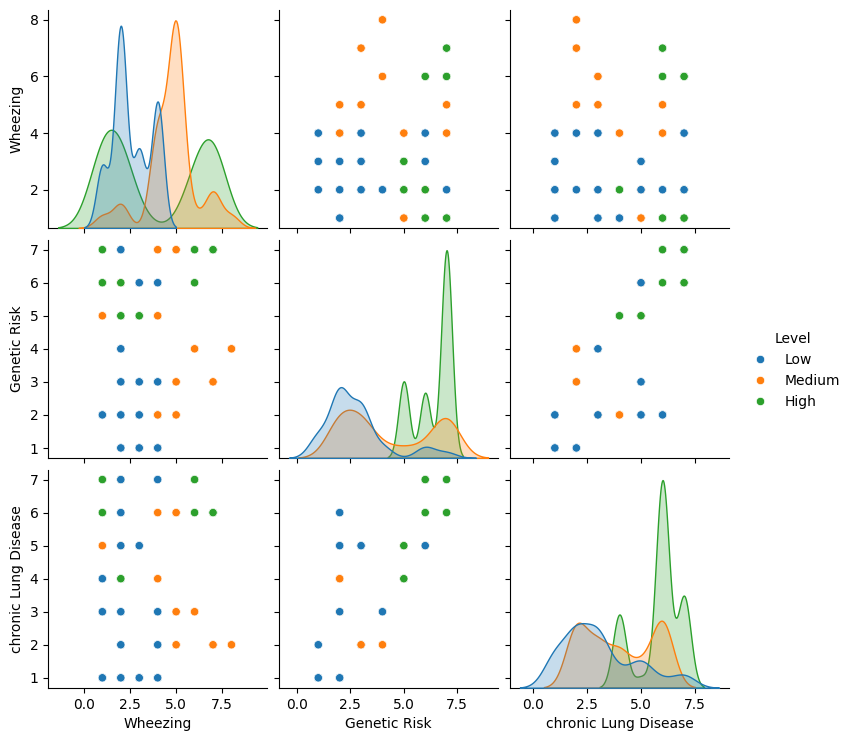

In [9]:

g.figure(figsize=(50,50))
s.pairplot(data=df , vars = ['Wheezing', 'Genetic Risk',
       'chronic Lung Disease']  , hue= 'Level')



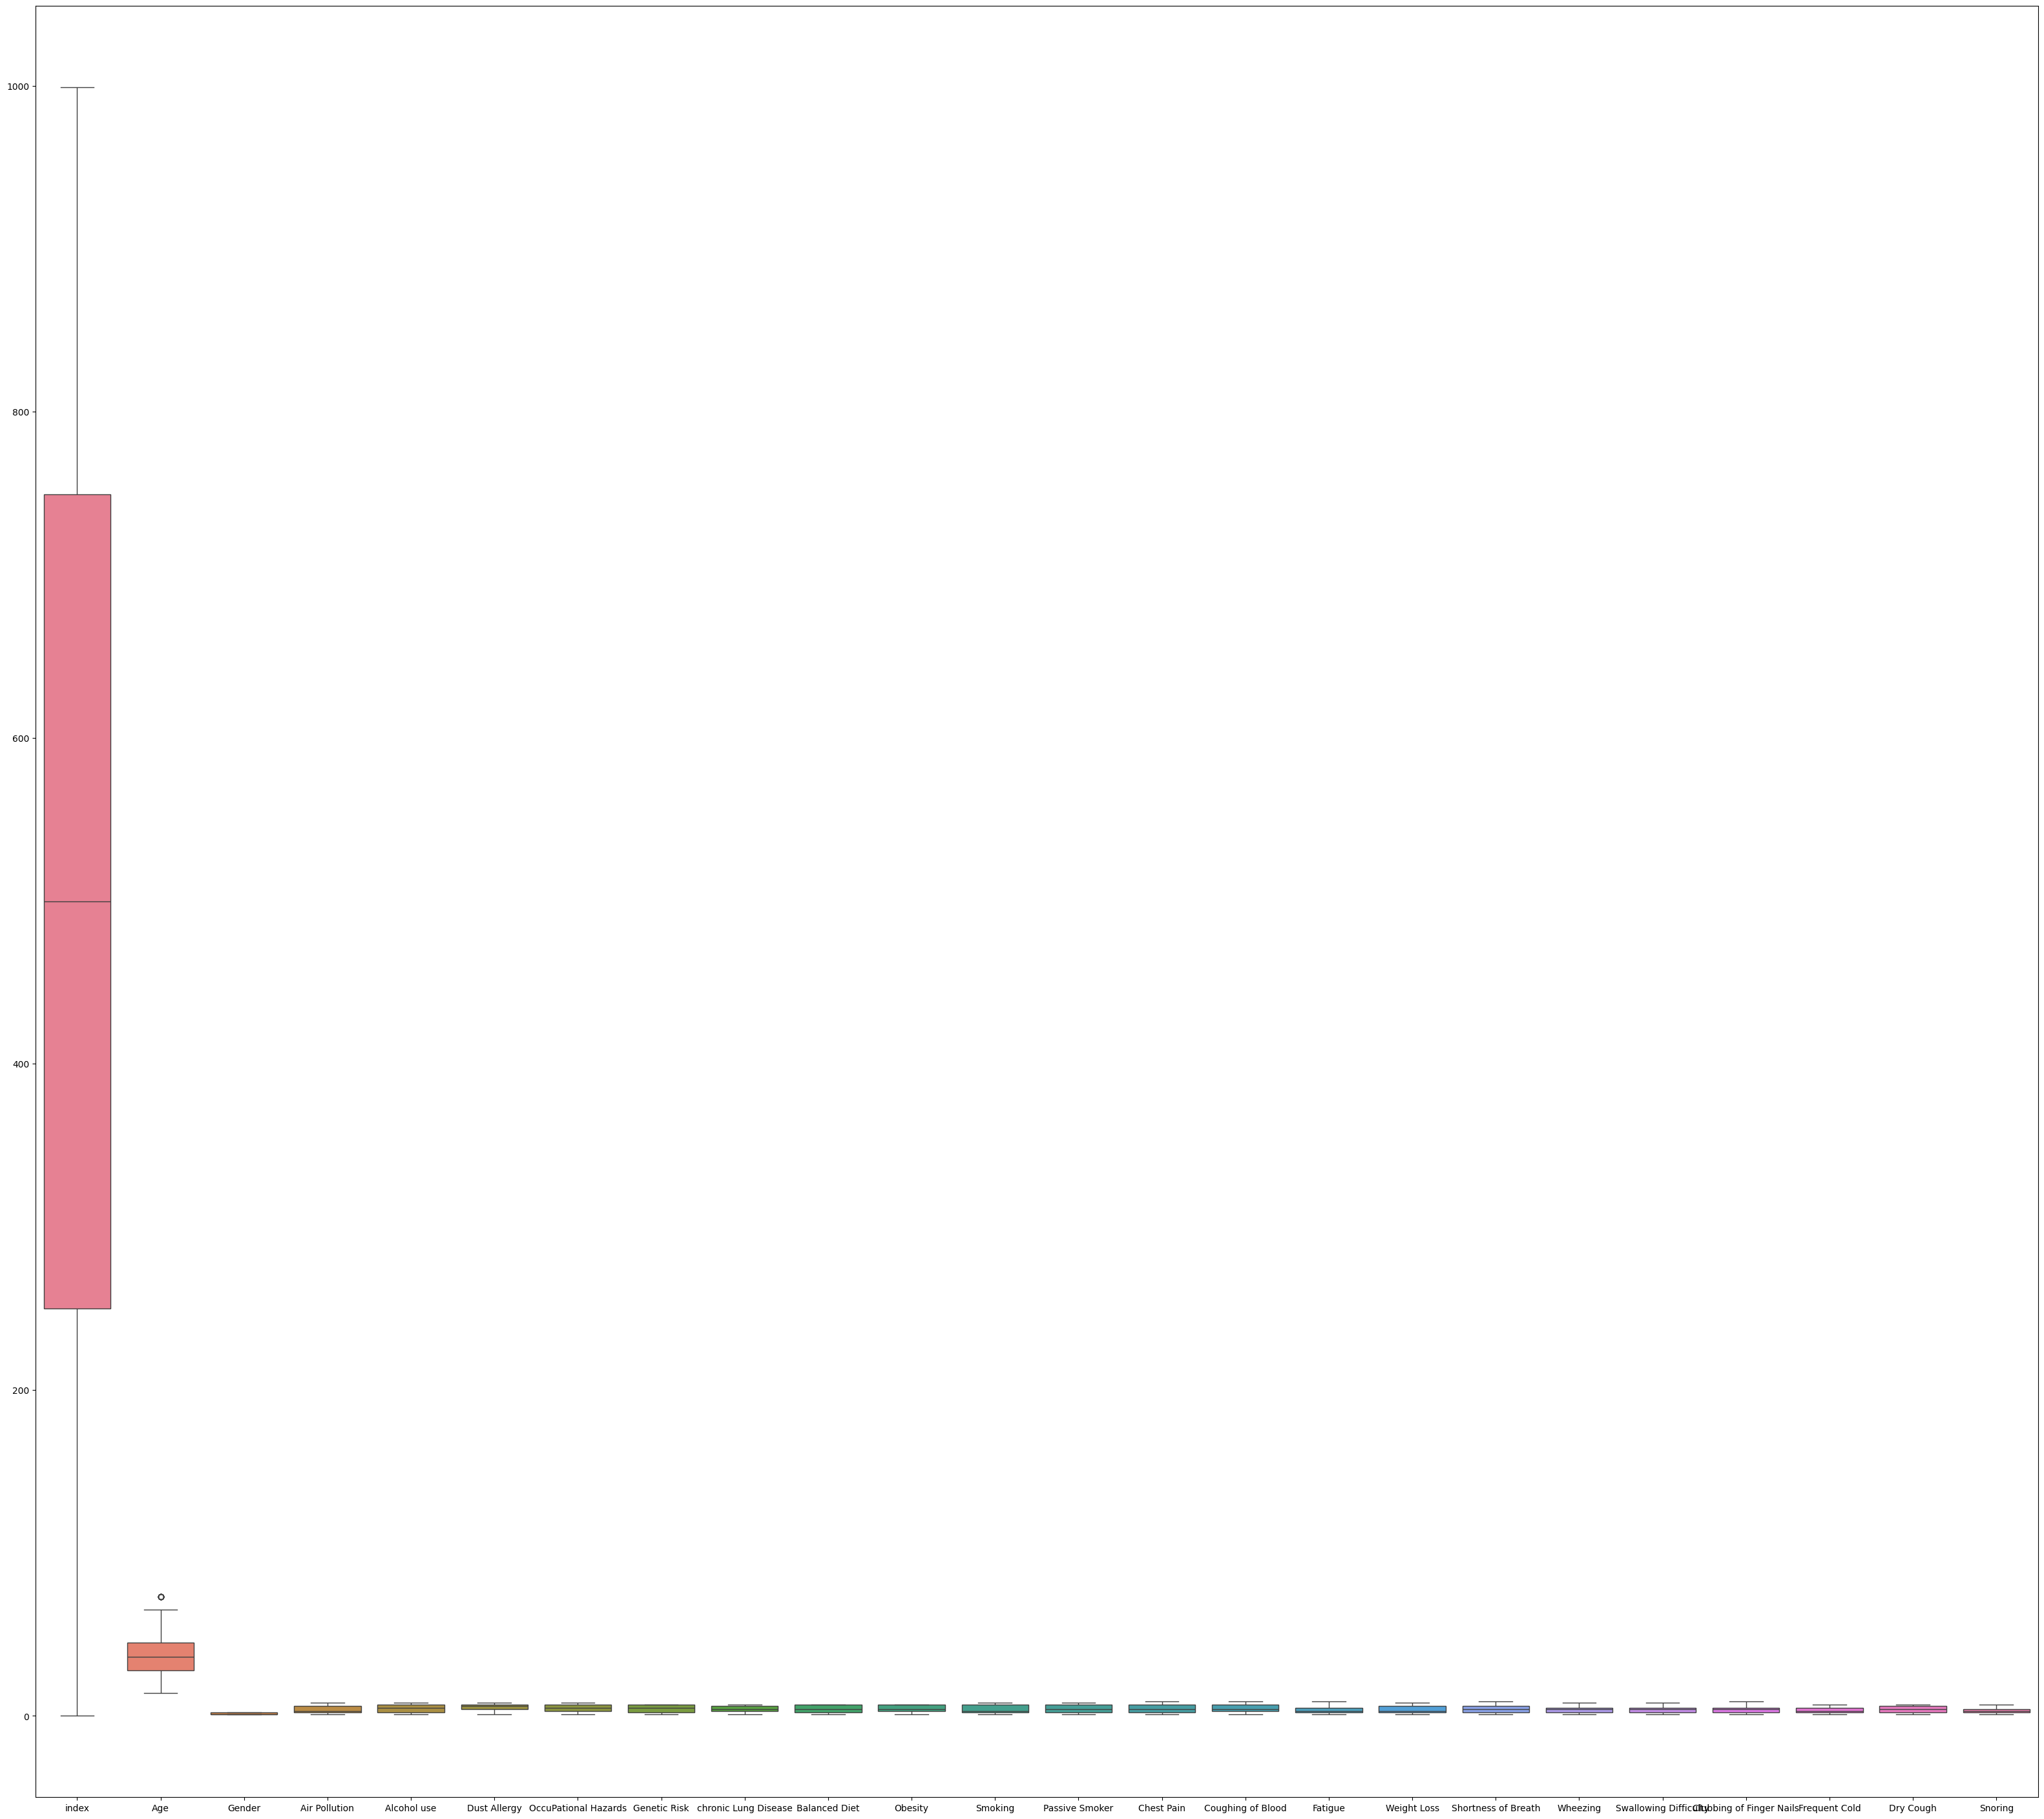

In [10]:
g.figure(figsize=(40,36))
s.boxplot(data=df)
g.show()


<Axes: xlabel='Passive Smoker', ylabel='Count'>

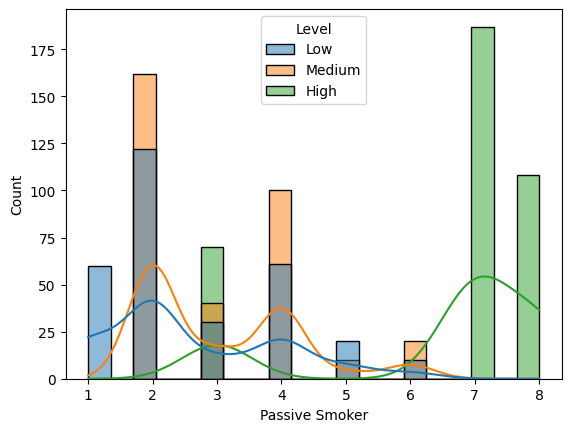

In [11]:

s.histplot(data=df, x='Passive Smoker', hue='Level', kde=True, bins=20)




In [12]:
percent = df['Level'].value_counts(normalize=True)
print(f"protions {percent}")

protions Level
High      0.365
Medium    0.332
Low       0.303
Name: proportion, dtype: float64


In [13]:
print(f"missing values \n {df.isnull().sum()}")
print(f"dup values \n {df.duplicated}")

missing values 
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64
dup values 
 <bound method DataFrame.duplicated of      index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2          

In [14]:
df = df.drop_duplicates()

df = df.drop(['index', 'Patient Id'], axis=1)


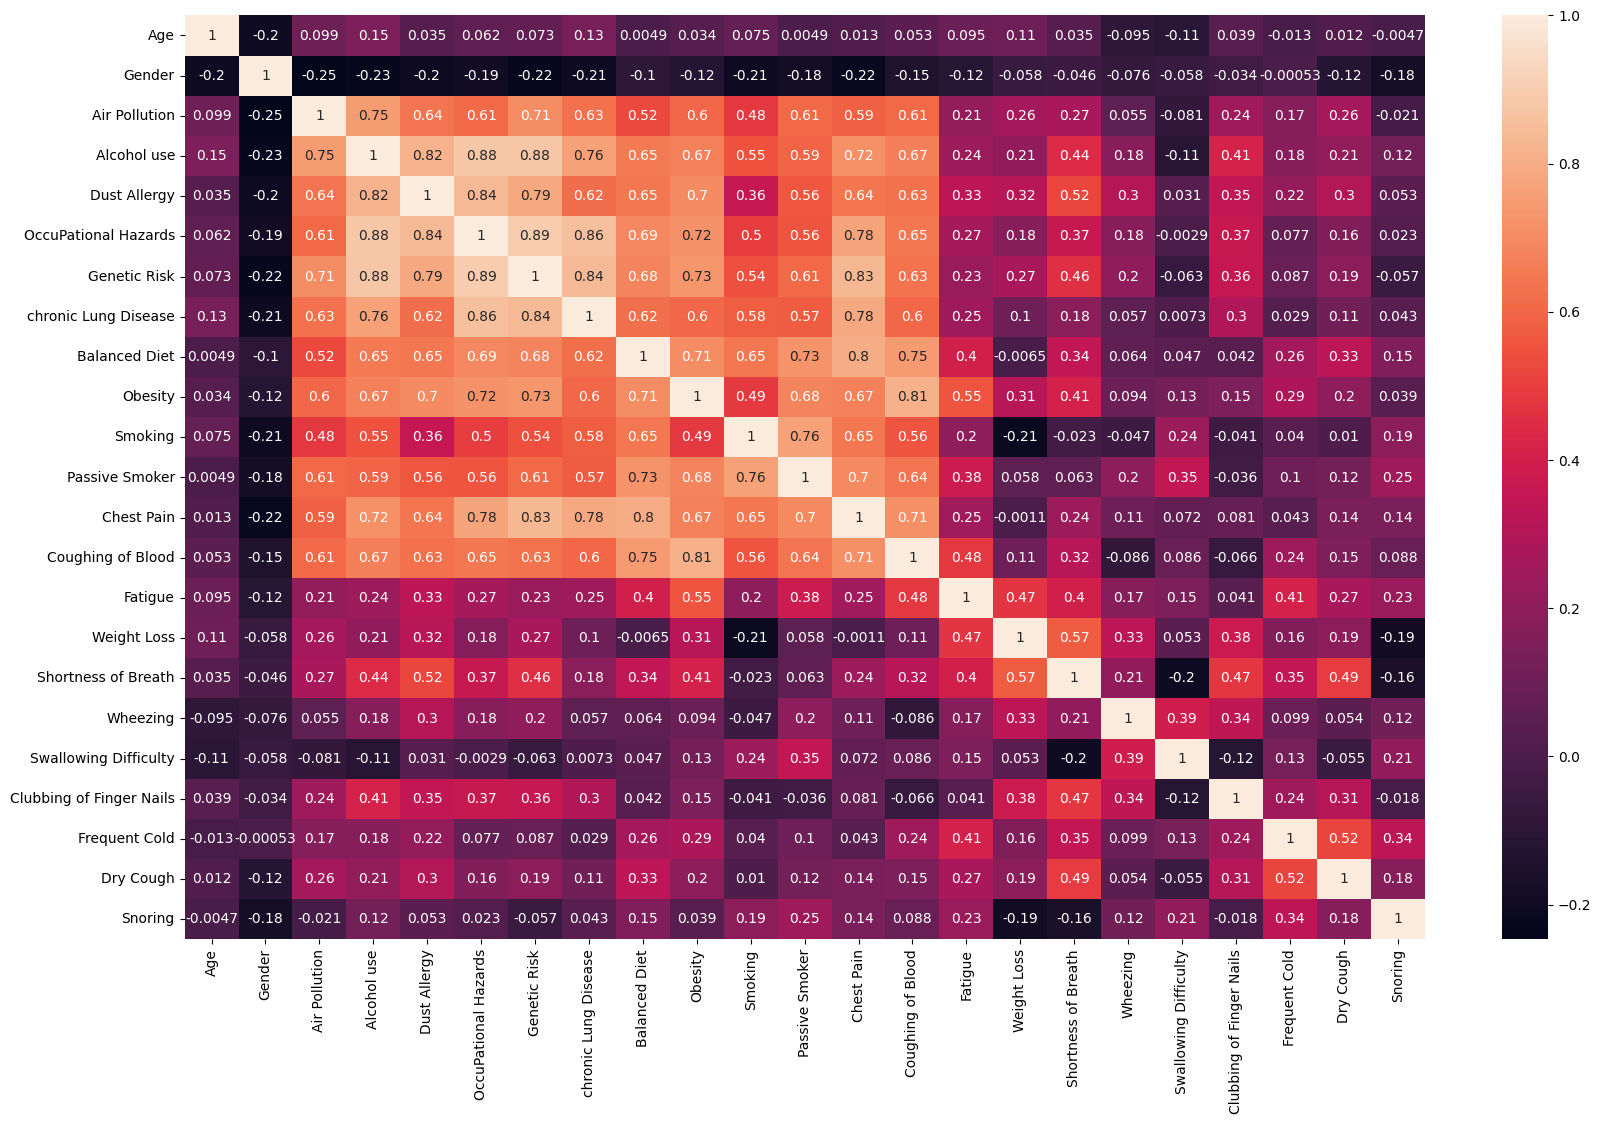

In [15]:
g.figure(figsize=(20,12))
corr = s.heatmap(df.corr(numeric_only=True) , annot = True)

In [16]:
X = df.drop(columns=['Level'] , axis =1)
y = df['Level']

In [17]:
num = X.select_dtypes(include=['int', 'object']).columns.tolist()


num_pipe = pipe(steps=[
    
    ('imputer' , si( strategy = 'median')),
    ('scaling ' , rs())
    
    
])

In [18]:
transform = ct( transformers = [
    
    ('numbers' , num_pipe , num )
    
    
])

In [19]:

pro = pipe(steps=[
    
    ('transform' , transform) ,
    ('dt class' , dt())
    
])

In [21]:
X_train , X_test, y_train , y_test =tt(X,y,  test_size = 0.2 , random_state = 0 , stratify = y )
# pheley x waleyy 
X_train , X_val, y_train , y_val =tt(X_train, y_train,  test_size = 0.25 , random_state = 0 , stratify = y_train)

In [17]:
pro.fit(X_train , y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling ',
                                                                   RobustScaler())]),
                                                  ['Age', 'Gender',
                                                   'Air Pollution',
                                                   'Alcohol use',
                                                   'Dust Allergy',
                                                   'OccuPational Hazards',
                                                   'Genetic Risk',
                                                   'chronic Lung Disease',
                                                   'Balanced Diet', 'Obesity',
                                                   'Smoking', 'Passive Smoker',
                                                   'Chest Pain',
                                                   'Coughing of Blood',
                                                   'Fatigue', 'Weight Loss',
                                                   'Shortness of Breath',
                                                   'Wheezing',
                                                   'Swallowing Difficulty',
                                                   'Clubbing of Finger Nails',
                                                   'Frequent Cold', 'Dry Cough',
                                                   'Snoring'])])),
                ('dt class', DecisionTreeClassifier())])

In [18]:
print(f"training acc {pro.score(X_train, y_train)}")
print(f"testing  acc {pro.score( X_test, y_test)}")

training acc 1.0
testing  acc 1.0


Report 

A balanced dataset means that all target classes have roughly equal representation.
If the dataset is imbalanced, models may become biased toward the majority class.

If missing values exist, I’ll fill them using mean/median for numeric columns or mode for categorical ones.
This preserves data size and avoids information loss.

Categorical columns will be encoded (e.g., pd.get_dummies() or LabelEncoder) for ML algorithms.

Duplicate rows are removed using df.drop_duplicates() to prevent data bias.

Pearson correlation measures linear relationships between numeric features (−1 to +1).
Features with very high correlation (>0.9) are redundant — they carry similar information.
We drop one of such features to reduce multicollinearity, improving model performance.
Feature scaling ensures all features contribute equally to distance-based models (like KNN or SVM).
If features are normally distributed, StandardScaler (z-score) is best.
If data is skewed or non-normal, MinMaxScaler or RobustScaler is preferred.


Training set: used to fit the model.
Validation set: used to tune model parameters (like choosing best K, α, etc.).
Test set: used only for final performance evaluation — never seen by the model.

In [22]:
# task 4 

import pandas as pd
import math

# Dataset
data = {
    'AGE': ['Young','Young','Young','Young','Young',
            'Middle','Middle','Middle','Middle','Middle',
            'Old','Old','Old','Old','Old'],
    'JOB_STATUS': [False,False,True,True,False,
                   False,False,True,False,False,
                   False,False,True,True,False],
    'OWNS_HOUSE': [False,True,False,True,False,
                   False,False,True,True,True,
                   True,True,False,False,False],
    'CREDIT_RATING': ['Fair','Good','Good','Fair','Fair',
                      'Fair','Good','Good','Excellent','Excellent',
                      'Excellent','Good','Good','Excellent','Fair'],
    'CLASS': ['No','No','Yes','Yes','No',
              'No','No','Yes','Yes','Yes',
              'Yes','Yes','Yes','Yes','No']
}

df = pd.DataFrame(data)

# --- Entropy ---
def entropy(series):
    probs = series.value_counts(normalize = True)
    return -(probs * probs.apply (lambda p : math.log2(p))).sum()

# --- Information Gain ---
def info_gain(df ,attr , target = 'CLASS'):
    base = entropy(df[target])
    weighted = 0.0
    for _, subset in df.groupby(attr):
        weight = len(subset)/ len(df)
        weighted += weight* entropy(subset[target])
    return base - weighted
# --- Compute IGs ---

attributes = ['AGE' , 'JOB_STATUS' , 'OWNS_HOUSE' , 'CREDIT_RATING']
igs = {attr : info_gain(df, attr ) for attr in attributes}




print(f"{igs}")
print("Root Node:", max(igs, key=igs.get))


{'AGE': 0.08300749985576883, 'JOB_STATUS': 0.32365019815155627, 'OWNS_HOUSE': 0.18580516288960114, 'CREDIT_RATING': 0.36298956253708536}
Root Node: CREDIT_RATING
